In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditrisk/CreditRisk.csv


### Using tensorflow, I will be doing Neural Network Regression on Credit Risk dataset. This will help understand whether a speficic customer is a Credit Risk (defaulter) or not.

### Step 1- Importing Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Read dataset
df = pd.read_csv('/kaggle/input/creditrisk/CreditRisk.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
print("This dataset has {0} rows and {1} columns".format(df.shape[0], df.shape[1]))

This dataset has 981 rows and 13 columns


### Step 2 - Identifying Identifier columns
'Loan_ID' is an identifier column. 
So we will remove this column.

In [5]:
df.drop(columns=["Loan_ID"], inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Step 3 - Identifying NULL Values (if any)
We will be replacing NA values with mean or mode values of the variable

In [6]:
df.isna().sum()

Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
# Replacing NA values with mean/mode values
df.Gender.fillna("Male", inplace=True)
df.Married.fillna("No", inplace=True)
df.Dependents.fillna(0, inplace=True)
df.Self_Employed.fillna("No", inplace=True)
df.LoanAmount.fillna(df.LoanAmount.mean(), inplace=True)
df.Credit_History.fillna(1, inplace=True)
df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.mean(), inplace=True)

df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Step 4 - Exploratory Data Analysis

#### What is the average Loan Amount for an Average Salary person?

In [8]:
mean_income = int(round(df["ApplicantIncome"].mean(), 0))
mean_salary = int(round(df["LoanAmount"].mean(), 0))
mean_loan_tenure = int(round(df["Loan_Amount_Term"].mean() / 12, 0))

print("A person having average Salary of ${0} takes an average Loan of amount: ${1}K with an average tenure of {2} years".format(mean_income, mean_salary, mean_loan_tenure))

A person having average Salary of $5180 takes an average Loan of amount: $143K with an average tenure of 29 years


#### What is the average salary of Employees Area wise - Urban/Rural/SemiUrban?

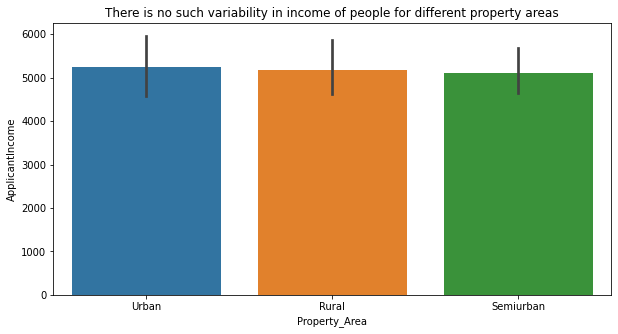

In [9]:
plt.figure(figsize=(10, 5))
plt.title("There is no such variability in income of people for different property areas")
sns.barplot(y=df["ApplicantIncome"], x=df["Property_Area"], estimator=np.mean)
plt.show()

#### People from which area have more higher-than-average salaries?
More semi-urban people have higher than average salaries. Urban areas have less population having higher-than-average salaries as compared to semi-urban. One reason behind this might be, that semi-urban regions have higher possibilities of establishing new businesses, which in turn generates more income.

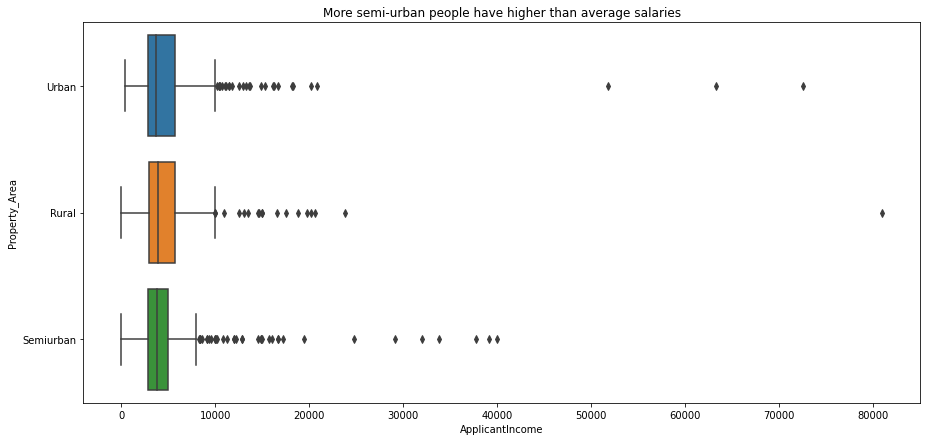

In [10]:
plt.figure(figsize=(15, 7))
plt.title("More semi-urban people have higher than average salaries")
sns.boxplot(x=df["ApplicantIncome"], y=df["Property_Area"])
plt.show()

#### Which Area's population has a tendency to take more loans?
Urban & Semi-Urban population has more tendency to take bank loans. 
<br> Possible reasons for this might be -
<br>
1) The cost of living in urban areas is higher than rural areas. Also, materialistic love is observed more in cities as compared to people living in rural areas. Naturally people tend to take loans to buy new stuff every time.
<br>
2) In rural areas, most of the people are illiterate. Hence, if not from banks, they take loans from Informal sectors, considering the amount of EMI they might have to pay on a monthly basis under stricter laws. Also, many Informal sectors provide loans based or property mortgage ignoring their loan eligibility like banks do.

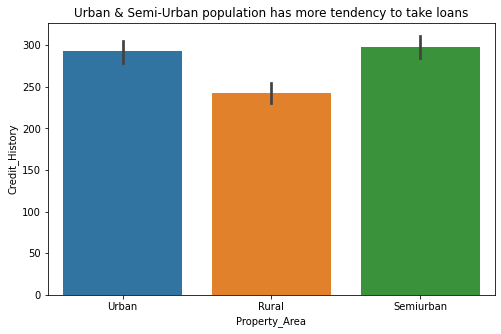

In [11]:
plt.figure(figsize=(8, 5))
plt.title("Urban & Semi-Urban population has more tendency to take loans")
sns.barplot(x=df["Property_Area"], y=df["Credit_History"], estimator=np.sum)
plt.show()

#### Is there a possibility that Graduates earn more than Non-Graduates? If so, in which region?
It is obvious from the graph below, that Graduates earn more than non-graduates. However, looking region-wise, if a person is non-graduate, then he/she has higher possibilities of getting more income in rural areas. This visualization also in a way, supports our above claim i.e. Rural populations take less loans from Banks, since they are not so well educated. There is a potential market for new bank clients in rural areas, if the population gets decent education.

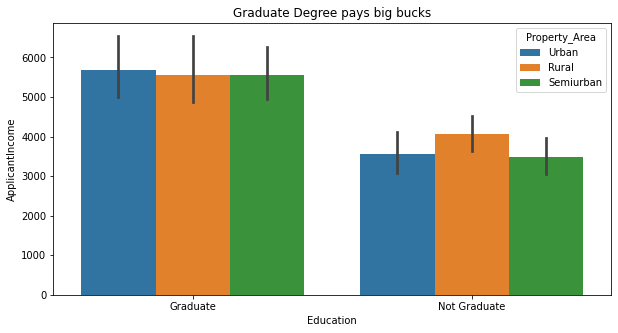

In [12]:
plt.figure(figsize=(10, 5))
plt.title("Graduate Degree pays big bucks")
sns.barplot(x=df["Education"], y=df["ApplicantIncome"], hue=df["Property_Area"], estimator=np.mean)
plt.show()

#### Do Self-Employed people need more Loans than Employed people?
Yes. More self employed people take loans as compared to employed people. Employed people having income less than 20K, take  loans, but their count is not as much as self-employed people having similar income range. 
<br>
Surprisingly, once self-employed people start earning more than 20K, their chances of taking bank loans, starts diminishing. This is where banks lose their customers. On the other hand, banks have higher chances to retain employed customers, as some of them tend to take loans, even after their salary extends 20K.

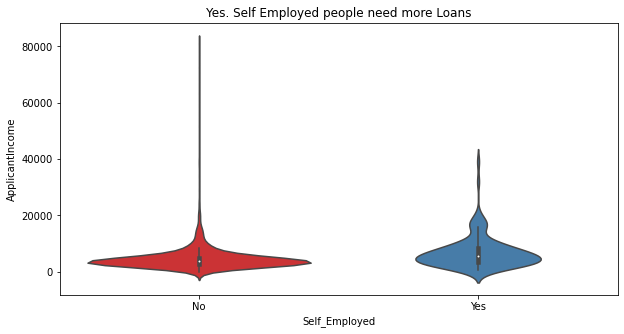

In [13]:
plt.figure(figsize=(10, 5))
plt.title("Yes. Self Employed people need more Loans")
sns.violinplot(x=df["Self_Employed"], y=df["ApplicantIncome"], estimator=np.mean, palette="Set1")
plt.show()

#### Who is an ideal customer for the bank?

Married men, who are employed graduates, living in Semiurban areas, are the most ideal customers for the bank. They show the most confidence of repaying loans with minimal credit risk

In [14]:
temp_df = df[df['Loan_Status'] == "Y"]
temp_df.shape

# Capture our Target Area based on highest no. of customers who have chances of loan repayment
area_wise_loan_confidence = temp_df["Property_Area"].value_counts().to_frame()
target_area = area_wise_loan_confidence.index[0]

# Check which gender person has more confidence in taking a loan
temp_df = temp_df[temp_df["Property_Area"] == target_area]
gender_wise_loan_confidence = temp_df["Gender"].value_counts().to_frame()
target_gender = gender_wise_loan_confidence.index[0]

# Check which marital status has more confidence in taking a loan
temp_df = temp_df[temp_df["Gender"] == target_gender]
marital_status_wise_loan_confidence = temp_df["Married"].value_counts().to_frame()
marital_status_wise_loan_confidence.head()
target_marital_status = marital_status_wise_loan_confidence.index[0]

# Check whether self-employed people have more confidence in taking a loan
temp_df = temp_df[temp_df["Married"] == target_marital_status]
employement_wise_loan_confidence = temp_df["Self_Employed"].value_counts().to_frame()
target_employment_status = employement_wise_loan_confidence.index[0]

# Check whether these employed people are graduates/non-graduates
temp_df = temp_df[temp_df["Self_Employed"] == target_employment_status]
education_wise_loan_confidence = temp_df["Education"].value_counts().to_frame()
target_education_status = education_wise_loan_confidence.index[0]

ideal_candidate_df = pd.DataFrame({
    "Property_Area": target_area,
    "Education": target_education_status,
    "Self_Employed": target_employment_status,
    "Marital_Status": target_marital_status,
    "Gender": target_gender
}, index=[0])

ideal_candidate_df.head()

,Property_Area,Education,Self_Employed,Marital_Status,Gender
0,Semiurban,Graduate,No,Yes,Male


### Step 4 - Performing Hot Encoding on Data
This helps in converting categorical values to numerical values

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df["Gender"] = le.fit_transform(df["Gender"])
df["Married"] = le.fit_transform(df["Married"])
df["Education"] = le.fit_transform(df["Education"])
df["Self_Employed"] = le.fit_transform(df["Self_Employed"])
df["Property_Area"] = le.fit_transform(df["Property_Area"])
df["Loan_Status"] = le.fit_transform(df["Loan_Status"])

df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.0,142.51153,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.00000,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.00000,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.00000,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.00000,360.0,1.0,2,1


### Step 5 - Splitting Train Test data

In [16]:
x = df.iloc[:, 0:11]  # Take all columns except Target variable in 'x' dataframe
y = df.iloc[:, 11]    # Take only target variable in 'y'

In [17]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0.0,0,0,5849,0.0,142.51153,360.0,1.0,2
1,1,1,1.0,0,0,4583,1508.0,128.00000,360.0,1.0,0
2,1,1,0.0,0,1,3000,0.0,66.00000,360.0,1.0,2
3,1,1,0.0,1,0,2583,2358.0,120.00000,360.0,1.0,2
4,1,0,0.0,0,0,6000,0.0,141.00000,360.0,1.0,2


In [18]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [19]:
# Perform train-test split
# We will be splitting data as 80% in training & 20% in testing. Hence test_size = 0.2

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [20]:
print("-----------------------")
print(X_train.shape)
print(y_train.shape)
print("-----------------------")
print(X_test.shape)
print(y_test.shape)
print("-----------------------")

-----------------------
(784, 11)
(784,)
-----------------------
(197, 11)
(197,)
-----------------------


### Step 6 - Model Development
We will be using tensorflow library for model development

In [21]:
# Initialize Sequential object
ann = tf.keras.models.Sequential()

# Total no. of Neurons = 6
# We will be adding 2 hidden layers in our Neural Network
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

# Adding Output Later
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Initializing our Compiler
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [22]:
# Train our model
ann.fit(X_train, y_train, batch_size=32, epochs=100, verbose=1)

Epoch 1/100
25/25 [==============================] - 1s 1ms/step - loss: 729.7500 - accuracy: 0.2882
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 421.5288 - accuracy: 0.2817
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 168.3278 - accuracy: 0.2897
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 26.2236 - accuracy: 0.6951
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 9.2507 - accuracy: 0.6667
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 9.9595 - accuracy: 0.6446
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 7.3305 - accuracy: 0.6425
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 4.6807 - accuracy: 0.5920
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 4.2336 - accuracy: 0.6695
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 3.6611 - accuracy: 0.6076
Ep

In [23]:
# 0.5 - Threshold to differentiate between 0 & 1 values
# Predict sample data and see if it model predicts properly or not

predicted_output = ann.predict([[1, 1, 1, 0, 2, 6000, 1000, 101, 360, 0, 2]])
predicted_output = 1 if predicted_output > 0.5 else 0

print(predicted_output)  # True i.e. There is a Credit Risk

1


### Step 7 - Predicting test data

In [24]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)   # This will predict output values as 'True' and 'False'

In [25]:
# Convert np array to Series
my_list = map(lambda x: x[0], y_pred)
y_pred = pd.Series(my_list)

# Convert True/False values back to 1 and 0s
y_prediction = y_pred.astype(int)

### Step 8 - Measuring Accuracy of our Model

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_prediction)
print(cm)
accuracy_score(y_test, y_prediction)

[[  0  49]
 [  2 146]]


0.7411167512690355

<AxesSubplot:>

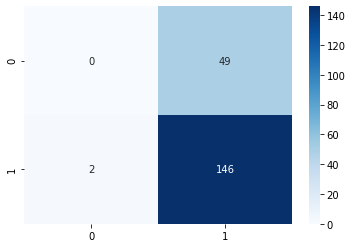

In [27]:
sns.heatmap(cm, cmap="Blues", annot=True, fmt='g')